In [272]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [274]:
base_url= 'https://en.wikipedia.org/wiki/'
url = base_url + 'List_of_United_States_cities_by_population'
res = requests.get(url)
soup = BeautifulSoup(res.content,'xml')
table = soup.find_all('table')[4]
cities_df = pd.read_html(str(table))[0]

In [275]:

cities_df.columns = ['2018rank', 'city', 'state', '2018estimate', '2010census', 'change(%)', '2016 land area(sq mi)', 
                     '2016 land area(sq km)', '2016 population density (/sq mi)', '2016 population density (/sq km)',
                    'location']
cities_df.drop(0, axis = 0, inplace=True)
print(cities_df.head())

  2018rank              city       state 2018estimate 2010census change(%)  \
1        1  New York City[d]    New York      8398748    8175133    +2.74%   
2        2       Los Angeles  California      3990456    3792621    +5.22%   
3        3           Chicago    Illinois      2705994    2695598    +0.39%   
4        4        Houston[3]       Texas      2325502    2100263   +10.72%   
5        5           Phoenix     Arizona      1660272    1445632   +14.85%   

  2016 land area(sq mi) 2016 land area(sq km)  \
1           301.5 sq mi             780.9 km2   
2           468.7 sq mi           1,213.9 km2   
3           227.3 sq mi             588.7 km2   
4           637.5 sq mi           1,651.1 km2   
5           517.6 sq mi           1,340.6 km2   

  2016 population density (/sq mi) 2016 population density (/sq km)  \
1                     28,317/sq mi                       10,933/km2   
2                      8,484/sq mi                        3,276/km2   
3                     1

In [276]:
# find individual urls from the table object
cities_df.city = cities_df.city.apply(lambda x: x.split('[')[0])

In [277]:
city_url = cities_df.city.apply(lambda x: base_url + "_".join(x.split()))
cities_df['wiki_city_url'] = city_url

In [278]:
cities_df.head()

,2018rank,city,state,2018estimate,2010census,change(%),2016 land area(sq mi),2016 land area(sq km),2016 population density (/sq mi),2016 population density (/sq km),location,wiki_city_url
1,1,New York City,New York,8398748,8175133,+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W,https://en.wikipedia.org/wiki/New_York_City
2,2,Los Angeles,California,3990456,3792621,+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W,https://en.wikipedia.org/wiki/Los_Angeles
3,3,Chicago,Illinois,2705994,2695598,+0.39%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W,https://en.wikipedia.org/wiki/Chicago
4,4,Houston,Texas,2325502,2100263,+10.72%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W,https://en.wikipedia.org/wiki/Houston
5,5,Phoenix,Arizona,1660272,1445632,+14.85%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W,https://en.wikipedia.org/wiki/Phoenix


### trying to get data from wiki for cities
- too much effort
- not the same data for cities
- not using this

### additional data (weather)
https://www.usclimatedata.com/climate/kokomo/indiana/united-states/usin0331

- get city names for all states (table)
- extract city codes usin087 or usmd873 etc and store them
- get url weather table for each city in the database
- add the data to the table

- default (without code) => washington DC weather

In [10]:
def get_weather_data(city, state, code):
    url='https://www.usclimatedata.com/climate/' + city + '/' + state + '/united-states/' + code
    table_idx = 2
    res = requests.get(url)
    soup = BeautifulSoup(res.content)
    table = soup.find_all('table')[table_idx]
    df = pd.read_html(str(table))[0]
    df = df.T.dropna(axis = 1)
    df.columns = df.iloc[0,:]
    df = df.drop(0, axis = 0)
    return df

In [13]:
# get_weather_data(city = 'new_york_city', state='new_york', code="")

,Annual high temperature:,Annual low temperature:,Average temperature:,Average annual precipitation - rainfall:,Days per year with precipitation - rainfall:,Annual hours of sunshine:,Av. annual snowfall:
1,64.8°F,46.6°F,55.7°F,40.78 inch,115 days,1783 hours,-


In [14]:
# get_weather_data(city = 'atlanta', state='indiana', code="")

,Annual high temperature:,Annual low temperature:,Average temperature:,Average annual precipitation - rainfall:,Days per year with precipitation - rainfall:,Annual hours of sunshine:,Av. annual snowfall:
1,64.8°F,46.6°F,55.7°F,40.78 inch,115 days,1783 hours,-


In [64]:
# STATE CODES TO GET TO THE PAGE
all_states = 'https://www.usclimatedata.com/'
state_table = BeautifulSoup(requests.get(all_states).content).find_all('table')[3]
state_urls = state_table.findAll('a')
test[-2].attrs['href']

state_codes = {}
for entry in state_urls:
    url = entry.attrs['href']
    state = url.split('/')[2]
    code = url.split('/')[-1]
    state_codes[state] = code

In [66]:
len(state_codes)

51

In [124]:
# state = 'california'
# url='https://www.usclimatedata.com/climate/'
# table = BeautifulSoup(requests.get(url + state + '/united-states/' + state_codes[state]).content).find_all('table')[3]
# table.find_all('a')

In [125]:
# CITY CODES in a STATE
city_codes = {}

for state in state_codes.keys():
    state_city_codes = {}
    url='https://www.usclimatedata.com/climate/'
    city_table = BeautifulSoup(requests.get(url + state + 
                                            '/united-states/' + state_codes[state])\
                               .content).find_all('table')[3]
    
    city_urls = city_table.findAll('a')
    for entry in city_urls:
        url = entry.attrs['href']
        city = url.split('/')[2]
        code = url.split('/')[-1]
        state_city_codes[city] = code
    if state == "new-york":
        print(state_city_codes)
    city_codes[state] = state_city_codes

{'addison': 'usny0006', 'erieville': 'usny2371', 'oceanside': 'usny2143', 'albany': 'usny0011', 'fabius': 'usny2376', 'ogdensburg': 'usny1057', 'albion': 'usny0013', 'falconer': 'usny2929', 'old-forge': 'usny1061', 'alcove': 'usny0014', 'farmingdale': 'usny3166', 'oneonta': 'usny2602', 'alfred': 'usny0019', 'franklin': 'usny2397', 'oswego': 'usny1078', 'angelica': 'usny0040', 'franklinville': 'usny0523', 'patchogue': 'usny1100', 'arcade': 'usny0048', 'fredonia': 'usny0524', 'pavilion': 'usny3056', 'ardsley': 'usny1643', 'garden-city': 'usny2080', 'penn-yan': 'usny1112', 'auburn': 'usny2207', 'geneva': 'usny0548', 'peru': 'usny1117', 'aurora': 'usny0069', 'glenham': 'usny0566', 'phoenicia': 'usny1853', 'avon': 'usny0074', 'glens-falls': 'usny0568', 'plattsburgh': 'usny1143', 'bainbridge': 'usny0076', 'gloversville': 'usny0571', 'port-jervis': 'usny1163', 'batavia': 'usny0090', 'gouverneur': 'usny0577', 'poughkeepsie': 'usny1174', 'bath': 'usny0091', 'gowanda': 'usny0578', 'ray-brook': '

In [127]:
# city_codes['new-york']['new-york']

'usny0996'

In [ ]:
# cities_df.head()

In [91]:
# get_weather_data('bloomington', 'indiana', city_codes['indiana']['indianapolis'])

,Annual high temperature:,Annual low temperature:,Average temperature:,Average annual precipitation - rainfall:,Days per year with precipitation - rainfall:,Annual hours of sunshine:,Av. annual snowfall:
1,62.4°F,43.8°F,53.1°F,42.2 inch,125 days,2439 hours,-


In [104]:
# get_weather_data('bloomington', 'indiana', city_codes['indiana']['bloomington']).values

array([['63.4°F', '43.1°F', '53.25°F', '47.32 inch', '-', '-', '16 inch']],
      dtype=object)

In [149]:
# https://www.usclimatedata.com/climate/indianapolis/indiana/united-states/usin1068
weather_cols = None
for i in range(cities_df.shape[0]):
    city = '-'.join(cities_df.iloc[i].city.lower().split())
    state = '-'.join(cities_df.iloc[i].state.lower().split())
    code = city_codes[state].get(city)
    data = ['-']*7
    if code:
        data = get_weather_data(city=city, state = state, code = code).values
    if weather_cols is not None:
        weather_cols = np.vstack((weather_cols, data))
    else:
        weather_cols = data

In [191]:
weather_col_names = ["Annual high temperature(F)", "Annual low temperature(F)", "Average temperature(F)", 
                    "Average annual precipitation - rainfall(in)", "Days per year with precipitation - rainfall(days)", 
                    "Annual hours of sunshine (hours)", "Av. annual snowfall"]


In [192]:
len(weather_cols), len(weather_cols[0])

(314, 7)

In [319]:
weather_df = pd.DataFrame(np.array(weather_cols))
weather_df.columns = weather_col_names
print(weather_df.head())

  Annual high temperature(F) Annual low temperature(F) Average temperature(F)  \
0                          -                         -                      -   
1                     71.7°F                    55.9°F                 63.8°F   
2                     56.8°F                    42.5°F                49.65°F   
3                     79.7°F                    60.2°F                69.95°F   
4                     86.7°F                    63.4°F                75.05°F   

  Average annual precipitation - rainfall(in)  \
0                                           -   
1                                  18.67 inch   
2                                   33.2 inch   
3                                  49.58 inch   
4                                   8.04 inch   

  Days per year with precipitation - rainfall(days)  \
0                                                 -   
1                                                 -   
2                                          120 days  

In [320]:
final_cols = np.hstack((cities_df.columns , weather_df.columns))
final_data = np.hstack((cities_df.values, weather_df.values))

final_df = pd.DataFrame(final_data)
final_df.columns = final_cols

In [321]:
final_df['2016 land area(sq km)'] = final_df['2016 land area(sq km)'].apply(lambda x: str(x).split()[0])
final_df['2016 land area(sq km)'] = final_df['2016 land area(sq km)'].apply(lambda x: "".join(x.split(",")))

final_df['2016 land area(sq mi)'] = final_df['2016 land area(sq mi)'].apply(lambda x: str(x).split()[0])
final_df['2016 land area(sq mi)'] = final_df['2016 land area(sq mi)'].apply(lambda x: "".join(x.split(",")))

In [322]:
final_df['2016 population density (/sq km)'] = final_df['2016 population density (/sq km)'].\
                                apply(lambda x: str(x).split('/')[0])
final_df['2016 population density (/sq km)'] = final_df['2016 population density (/sq km)'].\
                                apply(lambda x: "".join(x.split(",")))

final_df['2016 population density (/sq mi)'] = final_df['2016 population density (/sq mi)'].\
                                apply(lambda x: str(x).split('/')[0])
final_df['2016 population density (/sq mi)'] = final_df['2016 population density (/sq mi)'].\
                                apply(lambda x: "".join(x.split(",")))

In [323]:
final_df['Annual high temperature(F)'] = final_df['Annual high temperature(F)'].apply(lambda x:x.split('°')[0])
final_df['Annual low temperature(F)'] = final_df['Annual low temperature(F)'].apply(lambda x:x.split('°')[0])
final_df['Average temperature(F)'] = final_df['Average temperature(F)'].apply(lambda x:x.split('°')[0])
final_df['Average annual precipitation - rainfall(in)'] = \
final_df['Average annual precipitation - rainfall(in)'].apply(lambda x: x.split()[0])

final_df['Annual hours of sunshine (hours)'] = final_df['Annual hours of sunshine (hours)'].apply(lambda x:x.split()[0])
final_df['Days per year with precipitation - rainfall(days)'] = \
final_df['Days per year with precipitation - rainfall(days)'].apply(lambda  x: x.split()[0])

final_df['change(%)'] = final_df['change(%)'].apply(lambda x: str(x).split('%')[0])
final_df['change(%)'] = final_df['change(%)'].apply(lambda x: '-' + x[1:] if x[0] is not '+' else '+' + x[1:])

In [324]:
print(final_df.head())

  2018rank           city       state 2018estimate 2010census change(%)  \
0        1  New York City    New York      8398748    8175133     +2.74   
1        2    Los Angeles  California      3990456    3792621     +5.22   
2        3        Chicago    Illinois      2705994    2695598     +0.39   
3        4        Houston       Texas      2325502    2100263    +10.72   
4        5        Phoenix     Arizona      1660272    1445632    +14.85   

  2016 land area(sq mi) 2016 land area(sq km)  \
0                 301.5                 780.9   
1                 468.7                1213.9   
2                 227.3                 588.7   
3                 637.5                1651.1   
4                 517.6                1340.6   

  2016 population density (/sq mi) 2016 population density (/sq km)  \
0                            28317                            10933   
1                             8484                             3276   
2                            11900       

In [325]:
final_df.replace(to_replace='-', value=np.nan, inplace=True)
final_df.replace(to_replace='-ab]', value=0, inplace=True)

In [326]:
final_df['2018rank'] = final_df['2018rank'].astype(np.int)
final_df.city = final_df.city.astype(str)
final_df.state = final_df.state.astype(str)
final_df['2018estimate'] = final_df['2018estimate'].astype(np.int)
final_df['2010census'] = final_df['2010census'].astype(np.int)
final_df['2016 land area(sq km)'] = final_df['2016 land area(sq km)'].astype(np.float)
final_df['2016 land area(sq mi)'] = final_df['2016 land area(sq mi)'].astype(np.float)
final_df['2016 population density (/sq km)'] = final_df['2016 population density (/sq km)'].astype(np.float)
final_df['2016 population density (/sq mi)'] = final_df['2016 population density (/sq mi)'].astype(np.float)
final_df['2016 population density (/sq mi)'] = final_df['2016 population density (/sq mi)'].astype(np.float)

final_df['Annual high temperature(F)'] = final_df['Annual high temperature(F)'].astype(np.float)
final_df['Annual low temperature(F)'] = final_df['Annual low temperature(F)'].astype(np.float)
final_df['Average temperature(F)'] = final_df['Average temperature(F)'].astype(np.float)
final_df['Average annual precipitation - rainfall(in)'] = \
final_df['Average annual precipitation - rainfall(in)'].astype(np.float)

final_df['Annual hours of sunshine (hours)'] = final_df['Annual hours of sunshine (hours)'].astype(np.float)
final_df['Days per year with precipitation - rainfall(days)'] = \
final_df['Days per year with precipitation - rainfall(days)'].astype(np.float)

final_df['change(%)'] = final_df['change(%)'].astype(float)
print(final_df.dtypes)

2018rank                                               int64
city                                                  object
state                                                 object
2018estimate                                           int64
2010census                                             int64
change(%)                                            float64
2016 land area(sq mi)                                float64
2016 land area(sq km)                                float64
2016 population density (/sq mi)                     float64
2016 population density (/sq km)                     float64
location                                              object
wiki_city_url                                         object
Annual high temperature(F)                           float64
Annual low temperature(F)                            float64
Average temperature(F)                               float64
Average annual precipitation - rainfall(in)          float64
Days per year with preci

In [327]:
print(final_df['Av. annual snowfall'].isna().sum())
print(final_df['Annual hours of sunshine (hours)'].isna().sum())
print(final_df['Days per year with precipitation - rainfall(days)'].isna().sum())

final_df.drop(['Av. annual snowfall', 'Annual hours of sunshine (hours)','Days per year with precipitation - rainfall(days)'], axis = 1, inplace = True)

print(final_df.head())

226
286
285
   2018rank           city       state  2018estimate  2010census  change(%)  \
0         1  New York City    New York       8398748     8175133       2.74   
1         2    Los Angeles  California       3990456     3792621       5.22   
2         3        Chicago    Illinois       2705994     2695598       0.39   
3         4        Houston       Texas       2325502     2100263      10.72   
4         5        Phoenix     Arizona       1660272     1445632      14.85   

   2016 land area(sq mi)  2016 land area(sq km)  \
0                  301.5                  780.9   
1                  468.7                 1213.9   
2                  227.3                  588.7   
3                  637.5                 1651.1   
4                  517.6                 1340.6   

   2016 population density (/sq mi)  2016 population density (/sq km)  \
0                           28317.0                           10933.0   
1                            8484.0                         

In [328]:
final_df.to_csv(path_or_buf="cities_data.csv", header=True, sep=',', na_rep="-")

In [329]:
final_df.shape

(314, 16)

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

In [339]:
# population things
# correaltions
# bar plots (soted)
# others
final_df.columns
eda_cols = ['2018estimate', '2010census', 'change(%)', '2016 land area(sq mi)','2016 population density (/sq mi)']
            #'Annual high temperature(F)','Annual low temperature(F)', 'Average temperature(F)'
            #'Average annual precipitation - rainfall(in)']
#'2016 population density (/sq km)', \
# #            ]

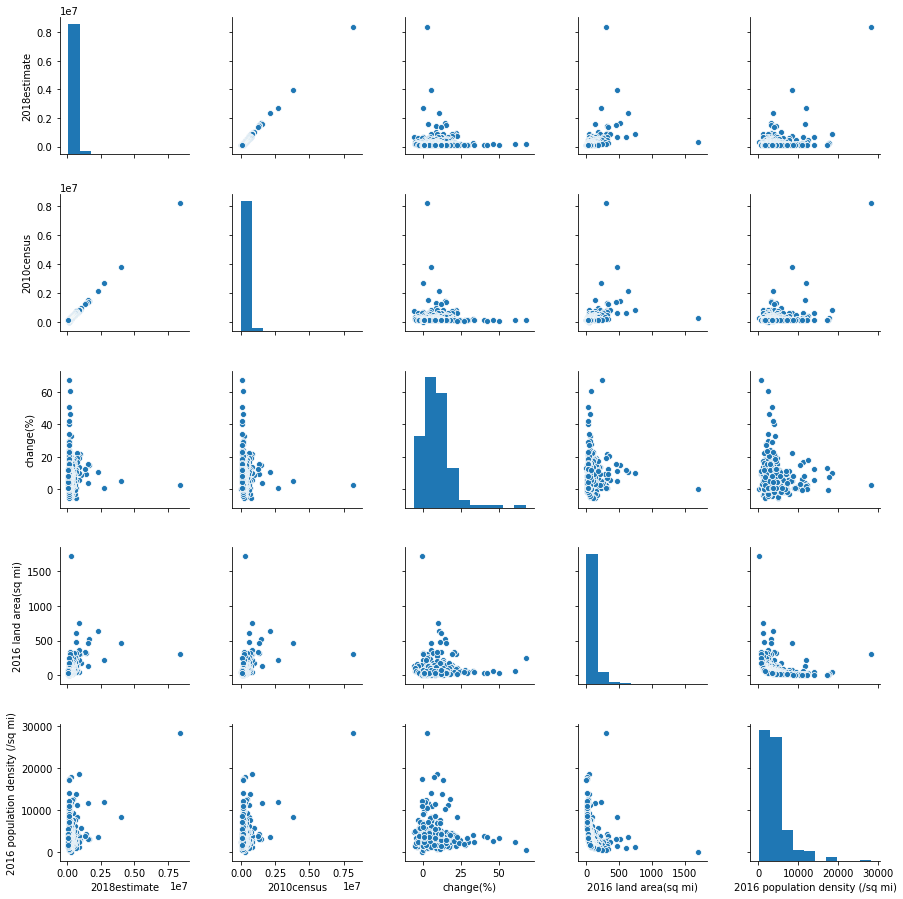

In [340]:
eda_df = final_df.replace(to_replace=np.nan, value="0")
sns.pairplot(eda_df, vars=eda_cols )

In [333]:
eda_df.dtypes

2018rank                                         int64
city                                            object
state                                           object
2018estimate                                     int64
2010census                                       int64
change(%)                                      float64
2016 land area(sq mi)                          float64
2016 land area(sq km)                          float64
2016 population density (/sq mi)               float64
2016 population density (/sq km)               float64
location                                        object
wiki_city_url                                   object
Annual high temperature(F)                      object
Annual low temperature(F)                       object
Average temperature(F)                          object
Average annual precipitation - rainfall(in)     object
dtype: object

In [345]:
temp_cols = ['Annual high temperature(F)','Annual low temperature(F)', 'Average temperature(F)',\
            'Average annual precipitation - rainfall(in)']
final_df[temp_cols].max()

Annual high temperature(F)                     87.30
Annual low temperature(F)                      70.70
Average temperature(F)                         77.60
Average annual precipitation - rainfall(in)    70.44
dtype: float64

In [349]:
sns.pairplot(data=final_df, vars=temp_cols, range=(0, 100))

TypeError: pairplot() got an unexpected keyword argument 'range'

Text(0,0.5,'Average annual precipitation - rainfall(in)')

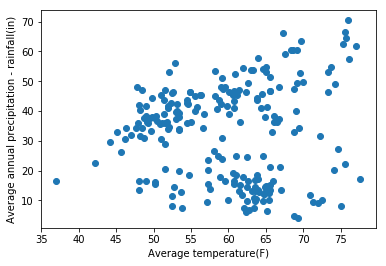

In [356]:
# plt.scatter(final_df[temp_cols[0]], final_df[temp_cols[1]])
# plt.figure()
# plt.scatter(final_df[temp_cols[1]], final_df[temp_cols[2]])
# plt.figure()
# plt.scatter(final_df[temp_cols[0]], final_df[temp_cols[2]])
# plt.figure()
plt.scatter(final_df[temp_cols[2]], final_df[temp_cols[3]])
plt.xlabel(temp_cols[2])
plt.ylabel(temp_cols[3])

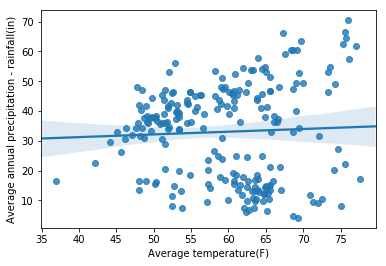

In [357]:
sns.regplot(final_df[temp_cols[2]], final_df[temp_cols[3]])

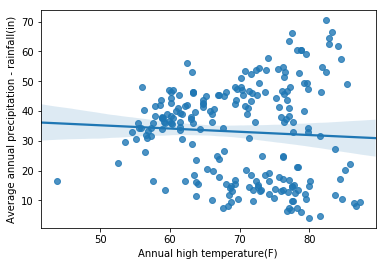

In [361]:
sns.regplot(final_df[temp_cols[0]], final_df[temp_cols[3]])

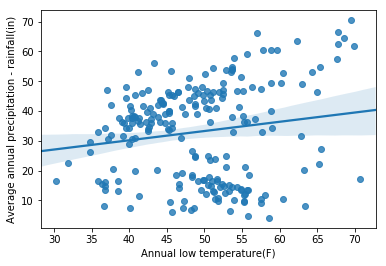

In [362]:
sns.regplot(final_df[temp_cols[1]], final_df[temp_cols[3]])

3445.5


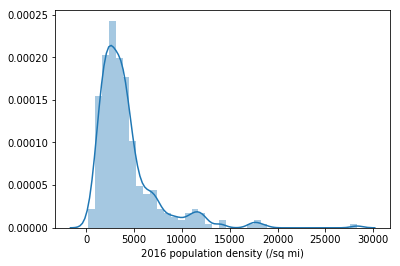

In [364]:
sns.distplot(final_df['2016 population density (/sq mi)'])
print(final_df['2016 population density (/sq mi)'].median())

In [366]:
mean_df = final_df.groupby('state').mean()

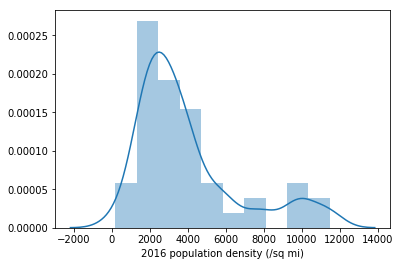

In [367]:
sns.distplot(mean_df['2016 population density (/sq mi)'])

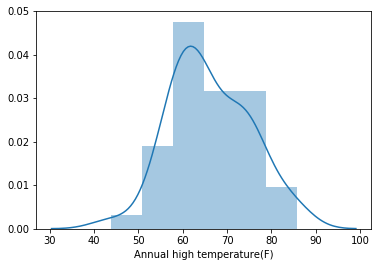

In [369]:
sns.distplot(mean_df['Annual high temperature(F)'].dropna())

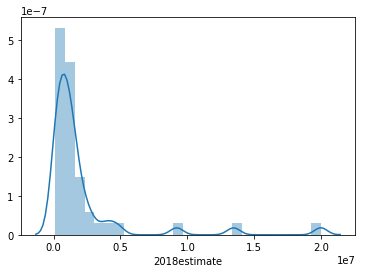

In [375]:
total_df = final_df.groupby('state').sum()
sns.distplot(total_df['2018estimate'])

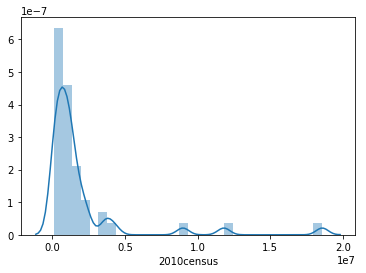

In [376]:
sns.distplot(total_df['2010census'])